<a href="https://colab.research.google.com/github/coderhetal/MNIST-Handwritten-digits-classification/blob/main/Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the library

In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import datasets , transforms


# Select device

In [2]:
if torch.cuda.is_available():
  DEVICE = "cuda:0"
else:
 DEVICE = "cpu"
device = torch.device(DEVICE)
print(f"Using {device} device")
print(torch.cuda.get_device_name(torch.cuda.current_device()))


Using cuda:0 device
Tesla T4


#Splitting into test and train sets

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = torchvision.datasets.MNIST('Data', train = True, download = True, transform = transform)
Data = torch.utils.data.DataLoader(train_dataset, batch_size = 512)

100%|██████████| 9912422/9912422 [00:00<00:00, 101845587.45it/s]


Extracting Data/MNIST/raw/train-images-idx3-ubyte.gz to Data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 40151042.04it/s]


Extracting Data/MNIST/raw/train-labels-idx1-ubyte.gz to Data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25523002.42it/s]


Extracting Data/MNIST/raw/t10k-images-idx3-ubyte.gz to Data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6369284.11it/s]


Extracting Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to Data/MNIST/raw



#Applying transformations

#CNN model

**Layers:**
2 convolutional layers and 3 fully connected layer

**In convolutional layer 1**

activation function used is ReLu ,
Max pooling is used .

**In convolutional layer 2**
activation function used is ReLu , Max pooling is used .

**3 Linear layers** with size 120,60,10 is used

**For output softmax layer is used .**
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2)

In [4]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.L1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.L2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.L3 = nn.Linear(7*7*64, 1000)
    self.L4 = nn.Linear(1000, 100)
    self.L5 = nn.Linear(100, 10)

  def forward(self, x):
    out = self.L1(x)
    out = self.L2(out)
    out = out.reshape(out.size(0), -1)
    out = self.L3(out)
    out = F.relu(out)
    out = self.L4(out)
    out = F.relu(out)
    out = self.L5(out)
    out = F.softmax(out, dim=1)
    return out

In [5]:

NeuralNet = Net()
NeuralNet = NeuralNet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(NeuralNet.parameters(), lr=0.02, momentum = 0.9)


In [29]:

loss_func = []
accuracy = []

for i in range(0,30):
  for k, (images, labels) in enumerate(Data):
    images = images.to(device)
    labels = labels.to(device)
    output = NeuralNet(images)
    loss = criterion(output, labels)
    loss_func.append(float(loss))
    total = labels.size(0)
    _, predicted = torch.max(output.data , 1)
    correct = (predicted == labels).sum().item()
    acc = correct*100/total
    accuracy.append(acc)
    #guess = np.argmax(output.detach().numpy(), axis=1)
    if k%10 == 0:
      print(loss)
      print(acc)
      #print(labels)
      #print(guess)
    NeuralNet.zero_grad()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

RuntimeError: ignored

In [14]:

NeuralNet = Net()
NeuralNet = NeuralNet.to(device)

In [16]:
NeuralNet.cpu()


Net(
  (L1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (L2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (L3): Linear(in_features=3136, out_features=1000, bias=True)
  (L4): Linear(in_features=1000, out_features=100, bias=True)
  (L5): Linear(in_features=100, out_features=10, bias=True)
)

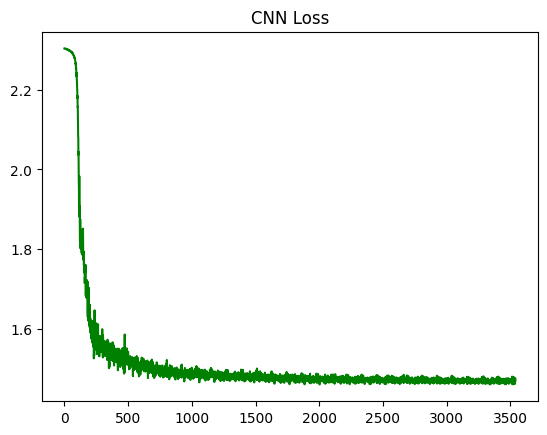

In [28]:
plt.plot(loss_func,"green")
plt.title("CNN Loss")
plt.show()


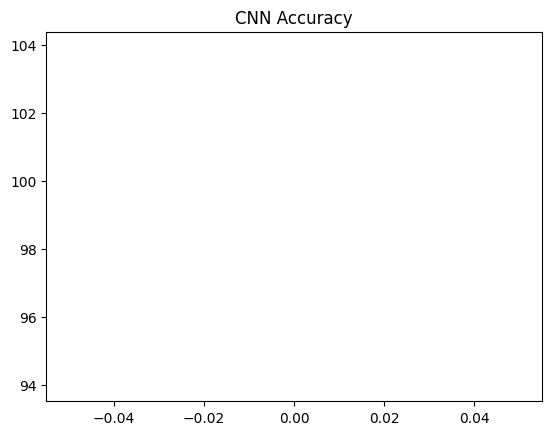

In [27]:
plt.plot(accuracy,"orange")
plt.title("CNN Accuracy")
plt.show()

#Testing

In [24]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
test_dataset = torchvision.datasets.MNIST('Data', train = False, download = True, transform = transform)
Data_test = torch.utils.data.DataLoader(test_dataset, batch_size = 512)

In [25]:
NeuralNet.cpu()

Net(
  (L1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (L2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (L3): Linear(in_features=3136, out_features=1000, bias=True)
  (L4): Linear(in_features=1000, out_features=100, bias=True)
  (L5): Linear(in_features=100, out_features=10, bias=True)
)

In [26]:
def predict(Data_test):
 with torch.no_grad():
    correct=0
    total=0

    for images,labels in Data_test:
        outputs=NeuralNet(images)

        predictions=torch.max(outputs,1)[1]
        correct+=(predictions==labels).sum().item()
        total+=labels.size(0)

accuracy=correct/total*100
print("Test Acuracy= ",accuracy)


Test Acuracy=  98.95833333333334
